# Imports


In [58]:
import math
import numpy  as np
import pandas as pd
import warnings
from sklearn.linear_model  import LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, classification_report, confusion_matrix)
import xgboost as xgb
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

warnings.filterwarnings( 'ignore' )

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataAnalytics/Datasets/dados_historicos_ibovespa_5_anos.csv')

In [46]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,27.06.2025,136.866,137.113,137.209,136.469,6.240000e+09,-0.18
1,26.06.2025,137.114,135.767,137.353,135.756,8.020000e+09,0.99
2,25.06.2025,135.767,137.163,137.163,135.565,7.710000e+09,-1.02
3,24.06.2025,137.165,136.552,138.156,136.254,8.080000e+09,0.45
4,23.06.2025,136.551,137.116,137.130,135.835,7.730000e+09,-0.41


###Verifica dados nulos

In [47]:
df.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0


In [48]:
# Transformando Var% e Vol em float tirando as letras
df['Var%'] = (df['Var%'].astype(str)
              .str.replace(',', '.')
              .str.replace('%', '')
              .astype(float))

df['Vol.'] = (df['Vol.'].astype(str)
              .str.replace(',', '.')
              .str.replace('K', 'e3')
              .str.replace('M', 'e6')
              .str.replace('B', 'e9') # Assuming 'B' means Billion, which is 10^9. Corrected to 'e9'
              .astype(float))

In [49]:
df2 = df.copy()

# 1. Converte a coluna 'Data' para o formato de data e define como índice
df2['Data'] = pd.to_datetime(df2['Data'], format='%d.%m.%Y')
df2.set_index('Data', inplace=True)

In [50]:
df2.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,1265.000000,1265.000000,1265.000000,1265.000000,1.265000e+03,1265.000000
mean,116.693357,116.654450,117.607680,115.746301,9.926242e+08,0.042814
std,11.062031,11.078886,10.948931,11.174568,3.157818e+09,1.178562
min,87.403000,86.951000,87.410000,85.384000,4.330000e+06,-4.870000
25%,108.368000,108.339000,109.331000,107.383000,9.100000e+06,-0.680000
50%,116.929000,116.907000,117.971000,115.924000,1.102000e+07,0.040000
75%,126.166000,126.165000,127.204000,125.566000,1.351000e+07,0.770000
max,140.110000,140.109000,140.382000,138.966000,2.487000e+10,5.540000


Text(0, 0.5, 'Valor (%)')

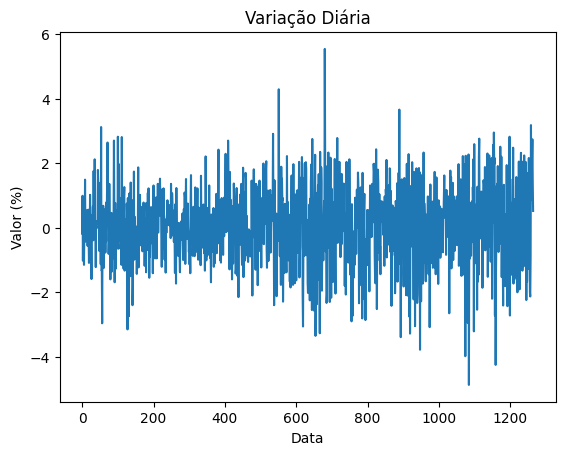

In [51]:
df2['Var%'].plot(kind='line')

plt.title("Variação Diária")
plt.xlabel("Data")
plt.ylabel("Valor (%)")

Text(0, 0.5, 'Valor')

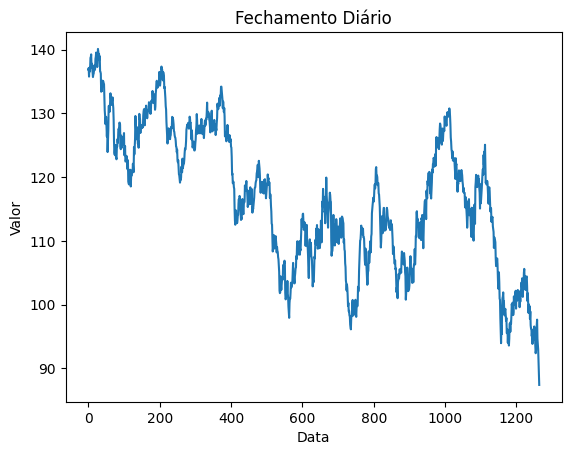

In [52]:
df2['Último'].plot(kind='line')

plt.title("Fechamento Diário")
plt.xlabel("Data")
plt.ylabel("Valor")

Text(0, 0.5, 'Valor')

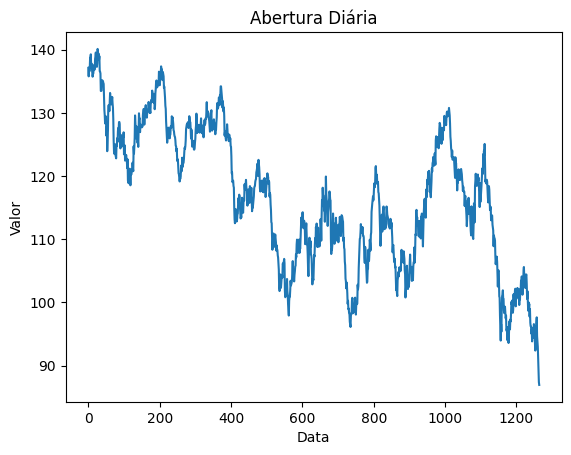

In [53]:
df2['Abertura'].plot(kind='line')

plt.title("Abertura Diária")
plt.xlabel("Data")
plt.ylabel("Valor")

Text(0, 0.5, 'Valor')

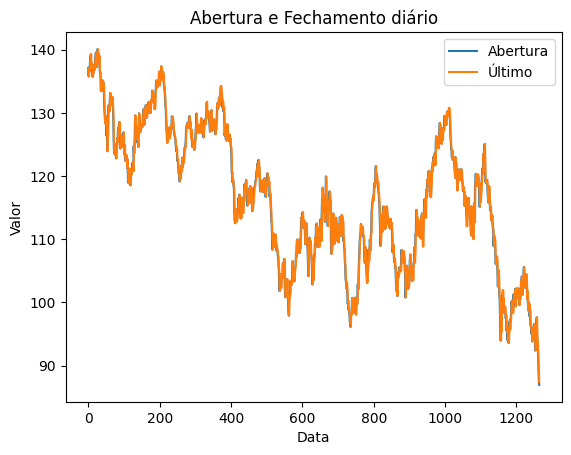

In [54]:
df2[['Abertura', 'Último']].plot(kind='line')

plt.title("Abertura e Fechamento diário")
plt.xlabel("Data")
plt.ylabel("Valor")

# Limpeza de dados e novas colunas

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1265 non-null   object 
 1   Último    1265 non-null   float64
 2   Abertura  1265 non-null   float64
 3   Máxima    1265 non-null   float64
 4   Mínima    1265 non-null   float64
 5   Vol.      1265 non-null   float64
 6   Var%      1265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 69.3+ KB


In [14]:
# Transformando Var% e Vol em float tirando as letras
df['Var%'] = (df['Var%'].astype(str)
              .str.replace(',', '.')
              .str.replace('%', '')
              .astype(float))

df['Vol.'] = (df['Vol.'].astype(str)
              .str.replace(',', '.')
              .str.replace('K', 'e3')
              .str.replace('M', 'e6')
              .str.replace('B', 'e9') # Assuming 'B' means Billion, which is 10^9. Corrected to 'e9'
              .astype(float))

In [15]:
df2 = df.copy()

# 1. Converte a coluna 'Data' para o formato de data e define como índice
df2['Data'] = pd.to_datetime(df2['Data'], format='%d.%m.%Y')
df2.set_index('Data', inplace=True)

# --- ETAPA 1: Criar os indicadores técnicos ---

df2['ano'] = df2.index.year
df2['mes'] = df2.index.month
df2['dia'] = df2.index.day
df2['dia_da_semana'] = df2.index.dayofweek
df2['semana_do_ano'] = df2.index.isocalendar().week

# Médias Móveis Simples (SMA) ->  soma os preços de fechamento dos últimos 5 dias e divide por 5.
df2['SMA_5'] = df2['Último'].rolling(window=5).mean()
df2['SMA_20'] = df2['Último'].rolling(window=20).mean()

# Índice de Força Relativa (RSI) -> relação entre as médias de ganhos e as médias de perdas em um determinado período (14 dias)
delta = df2['Último'].diff(1)
ganho = (delta.where(delta > 0, 0)).rolling(window=14).mean()
perda = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = ganho / perda
df2['RSI'] = 100 - (100 / (1 + rs))

# Range do Dia
df2['Range_Dia'] = df2['Máxima'] - df2['Mínima']

# Remove as linhas com NaN geradas pelos indicadores
df2.dropna(inplace=True)


# --- Criar as features atrasadas (D-1) ---

# Lista de todas as features que vamos usar do dia anterior
features_para_atrasar = [
    'Abertura', 'Máxima', 'Mínima', 'Vol.',
    'SMA_5', 'SMA_20', 'RSI', 'Range_Dia'
]

# Cria uma versão "_D-1" para cada uma
for feat in features_para_atrasar:
    df2[f'{feat}_D-1'] = df2[feat].shift(1)

# Remove a primeira linha que ficará com NaN após o shift
df2.dropna(inplace=True)


# Exibe o DataFrame com as novas colunas
df2.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,ano,mes,dia,dia_da_semana,...,RSI,Range_Dia,Abertura_D-1,Máxima_D-1,Mínima_D-1,Vol._D-1,SMA_5_D-1,SMA_20_D-1,RSI_D-1,Range_Dia_D-1
Data,,,,,,,,,,,,,,,,,,,,,
2025-05-29,138.534,138.869,139.108,137.993,8.830000e+09,-0.25,2025,5,29,3,...,49.049153,1.115,138.546,138.637,136.726,1.514000e+10,136.9196,137.11840,49.542040,1.911
2025-05-28,138.888,139.541,139.547,138.580,9.730000e+09,-0.47,2025,5,28,2,...,50.243556,0.967,138.869,139.108,137.993,8.830000e+09,137.3792,137.20180,49.049153,1.115
2025-05-27,139.541,138.136,140.382,138.136,1.119000e+10,1.02,2025,5,27,1,...,51.412149,2.246,139.541,139.547,138.580,9.730000e+09,137.7564,137.29050,50.243556,0.967
2025-05-26,138.136,137.824,138.800,137.795,5.550000e+09,0.23,2025,5,26,0,...,54.882048,1.005,138.136,140.382,138.136,1.119000e+10,138.1554,137.47920,51.412149,2.246
2025-05-23,137.824,137.273,137.824,134.997,1.068000e+10,0.40,2025,5,23,4,...,50.130747,2.827,137.824,138.800,137.795,5.550000e+09,138.4252,137.52775,54.882048,1.005


# Preparação de dados

In [16]:
df2.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,ano,mes,dia,dia_da_semana,...,RSI,Range_Dia,Abertura_D-1,Máxima_D-1,Mínima_D-1,Vol._D-1,SMA_5_D-1,SMA_20_D-1,RSI_D-1,Range_Dia_D-1
Data,,,,,,,,,,,,,,,,,,,,,
2025-05-29,138.534,138.869,139.108,137.993,8.830000e+09,-0.25,2025,5,29,3,...,49.049153,1.115,138.546,138.637,136.726,1.514000e+10,136.9196,137.11840,49.542040,1.911
2025-05-28,138.888,139.541,139.547,138.580,9.730000e+09,-0.47,2025,5,28,2,...,50.243556,0.967,138.869,139.108,137.993,8.830000e+09,137.3792,137.20180,49.049153,1.115
2025-05-27,139.541,138.136,140.382,138.136,1.119000e+10,1.02,2025,5,27,1,...,51.412149,2.246,139.541,139.547,138.580,9.730000e+09,137.7564,137.29050,50.243556,0.967
2025-05-26,138.136,137.824,138.800,137.795,5.550000e+09,0.23,2025,5,26,0,...,54.882048,1.005,138.136,140.382,138.136,1.119000e+10,138.1554,137.47920,51.412149,2.246
2025-05-23,137.824,137.273,137.824,134.997,1.068000e+10,0.40,2025,5,23,4,...,50.130747,2.827,137.824,138.800,137.795,5.550000e+09,138.4252,137.52775,54.882048,1.005


In [17]:
# Cria coluna alvo binária

df2.sort_index(inplace=True)
df2['alvo_class'] = (df2['Var%'] > 0).astype(int)

**Dividir em Treino e Teste:**

In [18]:
# Calcula o ponto de corte para separar os últimos 30 dias
split_point = len(df2) - 30

# df_train contém os dados até o ponto de corte
df_train = df2.iloc[:split_point].copy()

# df_test contém os dados a partir do ponto de corte (os últimos 30)
df_test = df2.iloc[split_point:].copy()

# --- Verificação ---
print(f"Total de registros: {len(df)}")
print("-" * 30)
print(f"Registros de treino: {len(df_train)}")
print(f"Início do treino: {df_train.index.min().date()}")
print(f"Fim do treino:    {df_train.index.max().date()}")
print("-" * 30)
print(f"Registros de teste: {len(df_test)}")
print(f"Início do teste:  {df_test.index.min().date()}")
print(f"Fim do teste:     {df_test.index.max().date()}")

Total de registros: 1265
------------------------------
Registros de treino: 1215
Início do treino: 2020-05-29
Fim do treino:    2025-04-14
------------------------------
Registros de teste: 30
Início do teste:  2025-04-15
Fim do teste:     2025-05-29


In [19]:
# A variável alvo 'y' é a coluna 'alvo_class'
y_train = df_train['alvo_class']
y_test = df_test['alvo_class']

# Lista de colunas para remover (alvo + features originais que vazam dados)
colunas_para_remover = [
    'alvo_class', 'Var%', 'Último',
    'Abertura', 'Máxima', 'Mínima', 'Vol.'
]

# As features 'X' são as colunas restantes
# Usamos as colunas _D-1 que criamos e removemos as originais
X_train = df_train.drop(columns=colunas_para_remover)
X_test = df_test.drop(columns=colunas_para_remover)

# --- Verificação ---
print("--- DADOS DE TREINO ---")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de y_train: {y_train.shape}")
print("\n--- DADOS DE TESTE ---")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\n--- COLUNAS EM X_train ---")
print(X_train.columns.to_list())

--- DADOS DE TREINO ---
Shape de X_train: (1215, 17)
Shape de y_train: (1215,)

--- DADOS DE TESTE ---
Shape de X_test: (30, 17)
Shape de y_test: (30,)

--- COLUNAS EM X_train ---
['ano', 'mes', 'dia', 'dia_da_semana', 'semana_do_ano', 'SMA_5', 'SMA_20', 'RSI', 'Range_Dia', 'Abertura_D-1', 'Máxima_D-1', 'Mínima_D-1', 'Vol._D-1', 'SMA_5_D-1', 'SMA_20_D-1', 'RSI_D-1', 'Range_Dia_D-1']


### Escalar dados

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Criando DF com dados para comparação


In [21]:
data = {
    'modelo': [
        'Regressão Logística',
        'Árvore de Decisão',
        'Random Forest',
        'Gradient Boost',
        'XGBoost'
    ],
    'acuracia': [0,0,0,0,0],
    'precisao': [0,0,0,0,0],
    'recall':   [0,0,0,0,0],
    'f1-score': [0,0,0,0,0]
}

# Criação do DataFrame
df_resultados = pd.DataFrame(data)
df_resultados

,modelo,acuracia,precisao,recall,f1-score
0,Regressão Logística,0,0,0,0
1,Árvore de Decisão,0,0,0,0
2,Random Forest,0,0,0,0
3,Gradient Boost,0,0,0,0
4,XGBoost,0,0,0,0


# Decision Tree

In [22]:
# Modelo Decision Tree
model = DecisionTreeClassifier(random_state=42)
model_name = 'Decision Tree'

print(f"--- Avaliação do Modelo: {model_name} ---")

# Treinamento
model.fit(X_train_scaled, y_train)

# Previsão
y_pred = model.predict(X_test_scaled)

# Métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()

# Relatório detalhado
print("=== RELATÓRIO DETALHADO ===")
print(classification_report(y_test, y_pred,
                          target_names=['Queda (0)', 'Alta (1)']))

# Matriz de confusão (apenas valores)
cm = confusion_matrix(y_test, y_pred)
print("=== MATRIZ DE CONFUSÃO ===")
print("              Predição")
print("Real      Queda  Alta")
print(f"Queda       {cm[0,0]}     {cm[0,1]}")
print(f"Alta        {cm[1,0]}     {cm[1,1]}")

# Adicionando resultado ao df_resultados
df_resultados.loc[df_resultados['modelo'] == 'Árvore de Decisão', ['acuracia', 'precisao', 'recall', 'f1-score']] = [accuracy, precision, recall, f1]


--- Avaliação do Modelo: Decision Tree ---
Acurácia: 0.5000
Precisão: 0.6429
Recall: 0.4737
F1-Score: 0.5455

=== RELATÓRIO DETALHADO ===
              precision    recall  f1-score   support

   Queda (0)       0.38      0.55      0.44        11
    Alta (1)       0.64      0.47      0.55        19

    accuracy                           0.50        30
   macro avg       0.51      0.51      0.49        30
weighted avg       0.54      0.50      0.51        30

=== MATRIZ DE CONFUSÃO ===
              Predição
Real      Queda  Alta
Queda       6     5
Alta        10     9


### **Gráficos**

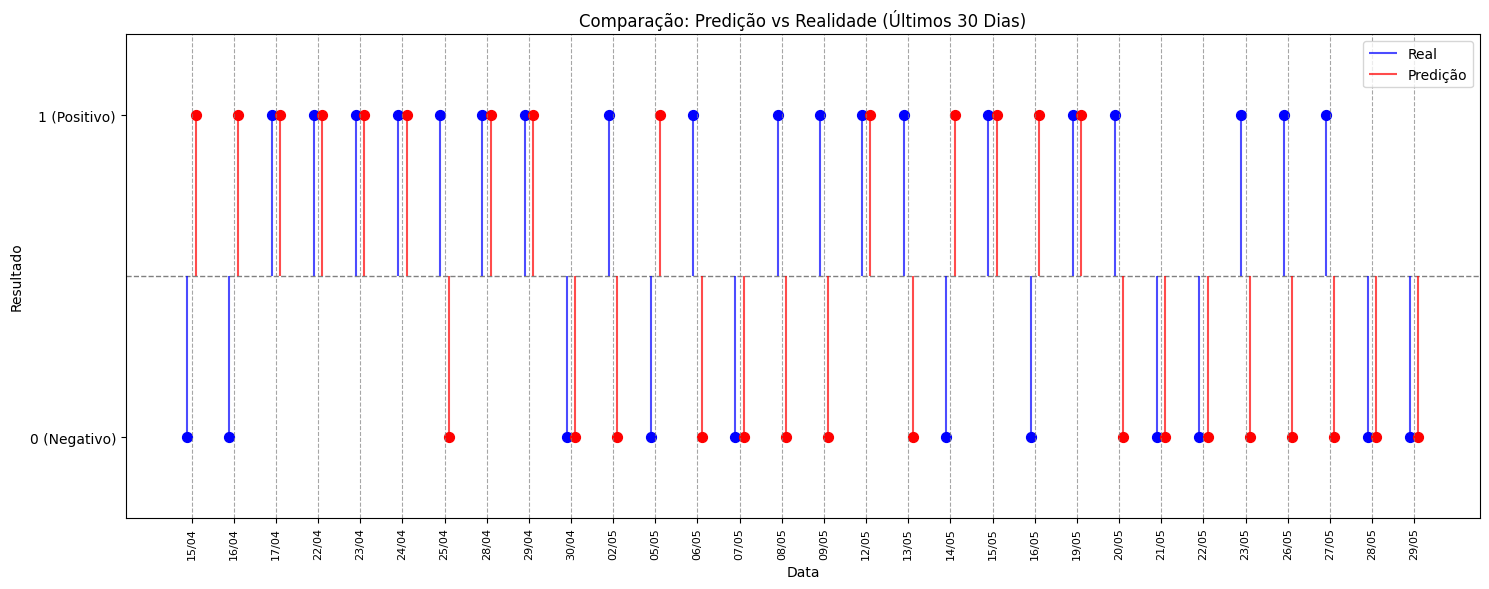

In [23]:
# Mapeia os valores: 0 para -1, 1 para 1
plot_real = np.where(y_test == 1, 1, -1)
plot_pred = np.where(y_pred == 1, 1, -1)

dates = df_test.index
variation_pct = df_test['Var%']

# Configuração do Gráfico
plt.figure(figsize=(15, 6))
ax = plt.gca()

# 1. Linha horizontal no centro
ax.axhline(0, color='grey', lw=1, linestyle='--')

# Posições no eixo X
x_pos = np.arange(len(dates))
offset = 0.1 # Deslocamento para não sobrepor os pontos

# 2. Plotar os dados como "pirulitos" (linhas verticais + pontos)
# Dados Reais
ax.vlines(x_pos - offset, 0, plot_real, color='blue', alpha=0.7, label='Real')
ax.scatter(x_pos - offset, plot_real, color='blue', s=50)

# Dados de Predição
ax.vlines(x_pos + offset, 0, plot_pred, color='red', alpha=0.7, label='Predição')
ax.scatter(x_pos + offset, plot_pred, color='red', s=50)

# 3. Ticks e Labels
# Ticks do eixo Y para mostrar 1 (Positivo) e 0 (Negativo)
ax.set_yticks([-1, 1])
ax.set_yticklabels(['0 (Negativo)', '1 (Positivo)'])
ax.set_ylim(-1.5, 1.5) # Adiciona espaço nas bordas

# Ticks do eixo X para todos os 30 dias
ax.set_xticks(x_pos)
ax.set_xticklabels([d.strftime('%d/%m') for d in dates], rotation=90, fontsize=8)

# Títulos e Legenda
plt.title('Comparação: Predição vs Realidade (Últimos 30 Dias)')
plt.xlabel('Data')
plt.ylabel('Resultado')
plt.legend()
plt.grid(True, axis='x', alpha=0.3) # Grade apenas no eixo X para clareza
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.grid(axis='x', which='both', linestyle='--', color='gray', alpha=0.7) # grid que separa os dias




plt.tight_layout()
plt.show()

In [24]:
# Análise detalhada
print("\n--- ANÁLISE DETALHADA ---")
print(f"Total de dias analisados: {len(y_test)}")
print(f"Dias positivos reais: {sum(y_test)}")
print(f"Dias negativos reais: {len(y_test) - sum(y_test)}")
print(f"Dias positivos preditos: {sum(y_pred)}")
print(f"Dias negativos preditos: {len(y_pred) - sum(y_pred)}")

# Acertos por classe
correct_positive = sum((y_test == 1) & (y_pred == 1))
correct_negative = sum((y_test == 0) & (y_pred == 0))
print(f"\nAcertos em dias positivos: {correct_positive}/{sum(y_test)}")
print(f"Acertos em dias negativos: {correct_negative}/{len(y_test) - sum(y_test)}")

# Criação de DataFrame com resultados detalhados
results_df = pd.DataFrame({
    'Data': dates,
    'Variacao_Real_%': variation_pct,
    'Classe_Real': y_test,
    'Classe_Predita': y_pred,
    'Acerto': y_test == y_pred
})

print("\n--- RESULTADOS DOS 30 DIAS DE TESTE ---")
print(results_df.to_string())




--- ANÁLISE DETALHADA ---
Total de dias analisados: 30
Dias positivos reais: 19
Dias negativos reais: 11
Dias positivos preditos: 14
Dias negativos preditos: 16

Acertos em dias positivos: 9/19
Acertos em dias negativos: 6/11

--- RESULTADOS DOS 30 DIAS DE TESTE ---
                 Data  Variacao_Real_%  Classe_Real  Classe_Predita  Acerto
Data                                                                       
2025-04-15 2025-04-15            -0.16            0               1   False
2025-04-16 2025-04-16            -0.72            0               1   False
2025-04-17 2025-04-17             1.04            1               1    True
2025-04-22 2025-04-22             0.63            1               1    True
2025-04-23 2025-04-23             1.34            1               1    True
2025-04-24 2025-04-24             1.79            1               1    True
2025-04-25 2025-04-25             0.12            1               0   False
2025-04-28 2025-04-28             0.21          


--- IMPORTÂNCIA DAS FEATURES ---
          Feature  Importance
8       Range_Dia    0.133455
15        RSI_D-1    0.116418
7             RSI    0.112762
12       Vol._D-1    0.101611
16  Range_Dia_D-1    0.097373
2             dia    0.069051
11     Mínima_D-1    0.049545
4   semana_do_ano    0.043180
14     SMA_20_D-1    0.040808
13      SMA_5_D-1    0.035452
3   dia_da_semana    0.035048
10     Máxima_D-1    0.034532
5           SMA_5    0.032911
6          SMA_20    0.029602
9    Abertura_D-1    0.027900
0             ano    0.027002
1             mes    0.013350


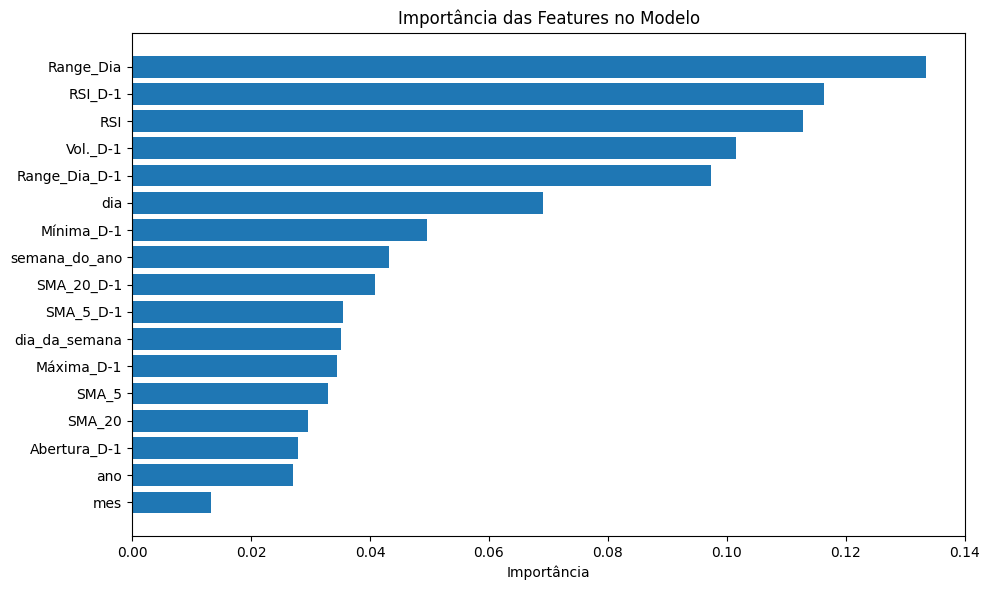

In [25]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- IMPORTÂNCIA DAS FEATURES ---")
print(feature_importance.to_string())

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Random Forest

In [26]:
# Modelo Decision Tree
model = RandomForestClassifier(random_state=42)
model_name = 'Random Forest'

print(f"--- Avaliação do Modelo: {model_name} ---")

# Treinamento
model.fit(X_train_scaled, y_train)

# Previsão
y_pred = model.predict(X_test_scaled)

# Métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()

# Relatório detalhado
print("=== RELATÓRIO DETALHADO ===")
print(classification_report(y_test, y_pred,
                          target_names=['Queda (0)', 'Alta (1)']))

# Matriz de confusão (apenas valores)
cm = confusion_matrix(y_test, y_pred)
print("=== MATRIZ DE CONFUSÃO ===")
print("              Predição")
print("Real      Queda  Alta")
print(f"Queda       {cm[0,0]}     {cm[0,1]}")
print(f"Alta        {cm[1,0]}     {cm[1,1]}")

# Adicionando resultado ao df_resultados
df_resultados.loc[df_resultados['modelo'] == 'Random Forest', ['acuracia', 'precisao', 'recall', 'f1-score']] = [accuracy, precision, recall, f1]

--- Avaliação do Modelo: Random Forest ---
Acurácia: 0.7000
Precisão: 0.7083
Recall: 0.8947
F1-Score: 0.7907

=== RELATÓRIO DETALHADO ===
              precision    recall  f1-score   support

   Queda (0)       0.67      0.36      0.47        11
    Alta (1)       0.71      0.89      0.79        19

    accuracy                           0.70        30
   macro avg       0.69      0.63      0.63        30
weighted avg       0.69      0.70      0.67        30

=== MATRIZ DE CONFUSÃO ===
              Predição
Real      Queda  Alta
Queda       4     7
Alta        2     17


### **Gráficos**

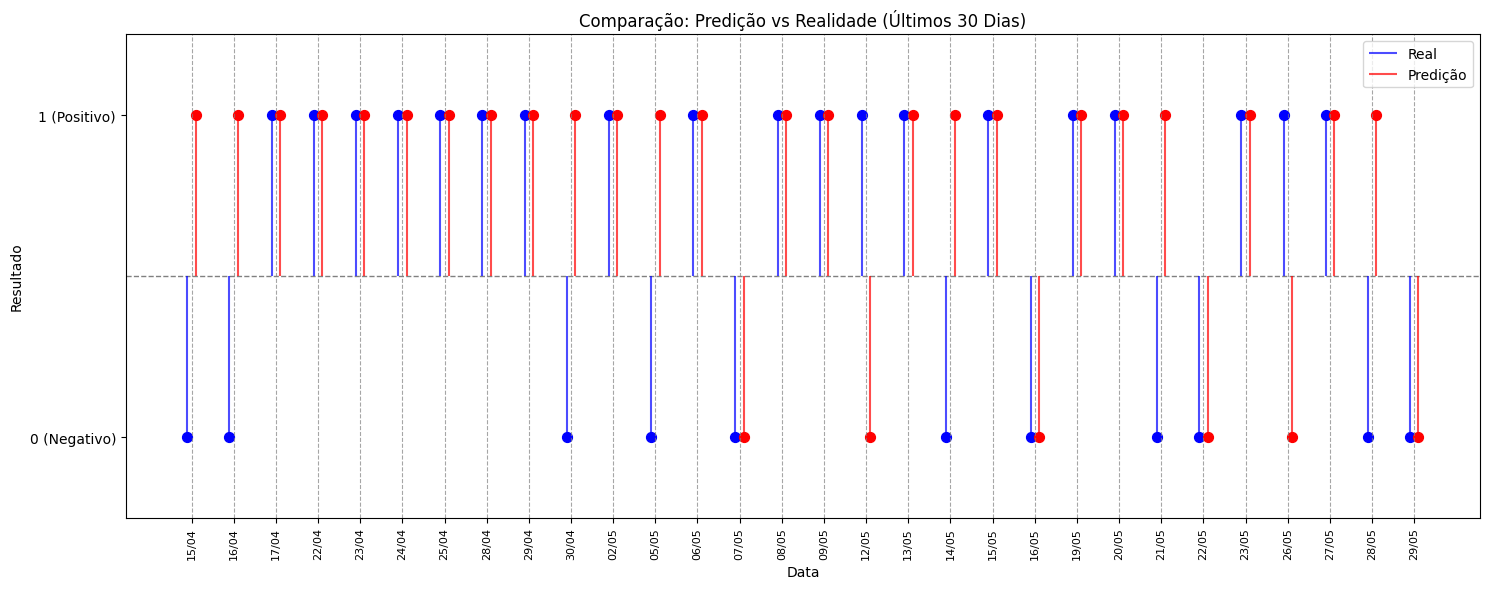

In [27]:
# Mapeia os valores: 0 para -1, 1 para 1
plot_real = np.where(y_test == 1, 1, -1)
plot_pred = np.where(y_pred == 1, 1, -1)

dates = df_test.index
variation_pct = df_test['Var%']

# Configuração do Gráfico
plt.figure(figsize=(15, 6))
ax = plt.gca()

# Linha horizontal no centro
ax.axhline(0, color='grey', lw=1, linestyle='--')

# Posições no eixo X
x_pos = np.arange(len(dates))
offset = 0.1 # Deslocamento para não sobrepor os pontos

# Dados Reais
ax.vlines(x_pos - offset, 0, plot_real, color='blue', alpha=0.7, label='Real')
ax.scatter(x_pos - offset, plot_real, color='blue', s=50)

# Dados de Predição
ax.vlines(x_pos + offset, 0, plot_pred, color='red', alpha=0.7, label='Predição')
ax.scatter(x_pos + offset, plot_pred, color='red', s=50)

# Ticks do eixo Y para mostrar 1 (Positivo) e 0 (Negativo)
ax.set_yticks([-1, 1])
ax.set_yticklabels(['0 (Negativo)', '1 (Positivo)'])
ax.set_ylim(-1.5, 1.5) # Adiciona espaço nas bordas

# Ticks do eixo X para todos os 30 dias
ax.set_xticks(x_pos)
ax.set_xticklabels([d.strftime('%d/%m') for d in dates], rotation=90, fontsize=8)

# Títulos e Legenda
plt.title('Comparação: Predição vs Realidade (Últimos 30 Dias)')
plt.xlabel('Data')
plt.ylabel('Resultado')
plt.legend()
plt.grid(True, axis='x', alpha=0.3) # Grade apenas no eixo X para clareza
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.grid(axis='x', which='both', linestyle='--', color='gray', alpha=0.7) # grid que separa os dias


plt.tight_layout()
plt.show()

In [28]:
# Análise detalhada
print("\n--- ANÁLISE DETALHADA ---")
print(f"Total de dias analisados: {len(y_test)}")
print(f"Dias positivos reais: {sum(y_test)}")
print(f"Dias negativos reais: {len(y_test) - sum(y_test)}")
print(f"Dias positivos preditos: {sum(y_pred)}")
print(f"Dias negativos preditos: {len(y_pred) - sum(y_pred)}")

# Acertos por classe
correct_positive = sum((y_test == 1) & (y_pred == 1))
correct_negative = sum((y_test == 0) & (y_pred == 0))
print(f"\nAcertos em dias positivos: {correct_positive}/{sum(y_test)}")
print(f"Acertos em dias negativos: {correct_negative}/{len(y_test) - sum(y_test)}")

# Criação de DataFrame com resultados detalhados
results_df = pd.DataFrame({
    'Data': dates,
    'Variacao_Real_%': variation_pct,
    'Classe_Real': y_test,
    'Classe_Predita': y_pred,
    'Acerto': y_test == y_pred
})

print("\n--- RESULTADOS DOS 30 DIAS DE TESTE ---")
print(results_df.to_string())




--- ANÁLISE DETALHADA ---
Total de dias analisados: 30
Dias positivos reais: 19
Dias negativos reais: 11
Dias positivos preditos: 24
Dias negativos preditos: 6

Acertos em dias positivos: 17/19
Acertos em dias negativos: 4/11

--- RESULTADOS DOS 30 DIAS DE TESTE ---
                 Data  Variacao_Real_%  Classe_Real  Classe_Predita  Acerto
Data                                                                       
2025-04-15 2025-04-15            -0.16            0               1   False
2025-04-16 2025-04-16            -0.72            0               1   False
2025-04-17 2025-04-17             1.04            1               1    True
2025-04-22 2025-04-22             0.63            1               1    True
2025-04-23 2025-04-23             1.34            1               1    True
2025-04-24 2025-04-24             1.79            1               1    True
2025-04-25 2025-04-25             0.12            1               1    True
2025-04-28 2025-04-28             0.21          


--- IMPORTÂNCIA DAS FEATURES ---
          Feature  Importance
16  Range_Dia_D-1    0.088419
8       Range_Dia    0.087378
12       Vol._D-1    0.082859
7             RSI    0.072702
15        RSI_D-1    0.071579
6          SMA_20    0.062930
2             dia    0.061941
9    Abertura_D-1    0.061216
14     SMA_20_D-1    0.060210
13      SMA_5_D-1    0.058837
10     Máxima_D-1    0.057051
11     Mínima_D-1    0.056872
5           SMA_5    0.055150
4   semana_do_ano    0.043236
3   dia_da_semana    0.030449
1             mes    0.029405
0             ano    0.019767


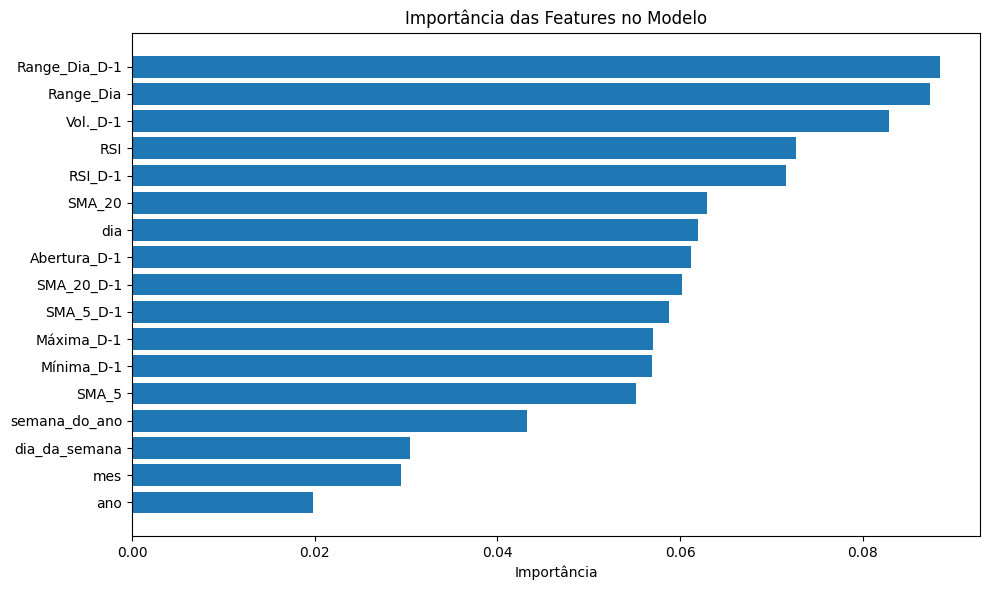

In [29]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- IMPORTÂNCIA DAS FEATURES ---")
print(feature_importance.to_string())

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Logistic Regression

In [30]:
# Modelo Logistic Regression
model = LogisticRegression(random_state=42)

print(f"--- Avaliação do Modelo: Logistic Regression---")

# Treinamento
model.fit(X_train_scaled, y_train)

# Previsão
y_pred = model.predict(X_test_scaled)

# Métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()

# Relatório detalhado
print("=== RELATÓRIO DETALHADO ===")
print(classification_report(y_test, y_pred,
                          target_names=['Queda (0)', 'Alta (1)']))

# Matriz de confusão (apenas valores)
cm = confusion_matrix(y_test, y_pred)
print("=== MATRIZ DE CONFUSÃO ===")
print("              Predição")
print("Real      Queda  Alta")
print(f"Queda       {cm[0,0]}     {cm[0,1]}")
print(f"Alta        {cm[1,0]}     {cm[1,1]}")

# Adicionando resultado ao df_resultados
df_resultados.loc[df_resultados['modelo'] == 'Regressão Logística', ['acuracia', 'precisao', 'recall', 'f1-score']] = [accuracy, precision, recall, f1]

--- Avaliação do Modelo: Logistic Regression---
Acurácia: 0.6000
Precisão: 0.6207
Recall: 0.9474
F1-Score: 0.7500

=== RELATÓRIO DETALHADO ===
              precision    recall  f1-score   support

   Queda (0)       0.00      0.00      0.00        11
    Alta (1)       0.62      0.95      0.75        19

    accuracy                           0.60        30
   macro avg       0.31      0.47      0.38        30
weighted avg       0.39      0.60      0.47        30

=== MATRIZ DE CONFUSÃO ===
              Predição
Real      Queda  Alta
Queda       0     11
Alta        1     18


### **Gráficos**

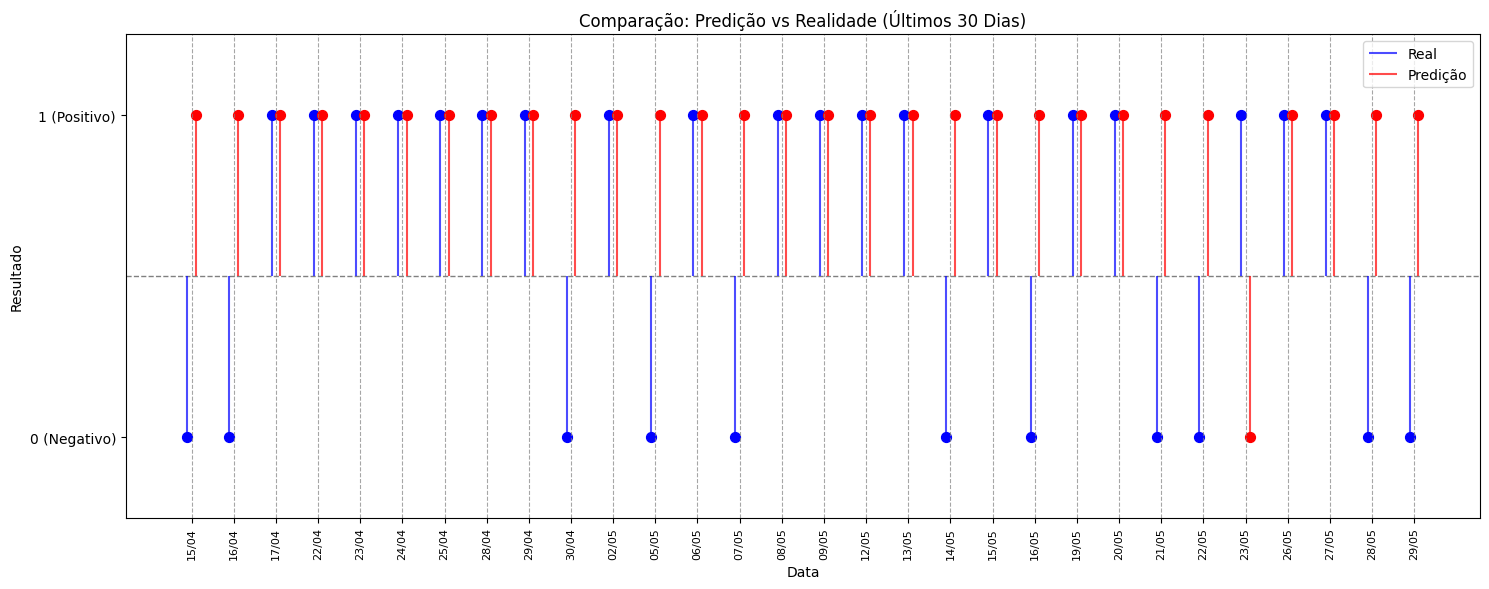

In [31]:
# Mapeia os valores: 0 para -1, 1 para 1
plot_real = np.where(y_test == 1, 1, -1)
plot_pred = np.where(y_pred == 1, 1, -1)

dates = df_test.index
variation_pct = df_test['Var%']

# Configuração do Gráfico
plt.figure(figsize=(15, 6))
ax = plt.gca()

# Linha horizontal no centro
ax.axhline(0, color='grey', lw=1, linestyle='--')

# Posições no eixo X
x_pos = np.arange(len(dates))
offset = 0.1 # Deslocamento para não sobrepor os pontos

# Dados Reais
ax.vlines(x_pos - offset, 0, plot_real, color='blue', alpha=0.7, label='Real')
ax.scatter(x_pos - offset, plot_real, color='blue', s=50)

# Dados de Predição
ax.vlines(x_pos + offset, 0, plot_pred, color='red', alpha=0.7, label='Predição')
ax.scatter(x_pos + offset, plot_pred, color='red', s=50)

# Ticks do eixo Y para mostrar 1 (Positivo) e 0 (Negativo)
ax.set_yticks([-1, 1])
ax.set_yticklabels(['0 (Negativo)', '1 (Positivo)'])
ax.set_ylim(-1.5, 1.5) # Adiciona espaço nas bordas

# Ticks do eixo X para todos os 30 dias
ax.set_xticks(x_pos)
ax.set_xticklabels([d.strftime('%d/%m') for d in dates], rotation=90, fontsize=8)

# Títulos e Legenda
plt.title('Comparação: Predição vs Realidade (Últimos 30 Dias)')
plt.xlabel('Data')
plt.ylabel('Resultado')
plt.legend()
plt.grid(True, axis='x', alpha=0.3) # Grade apenas no eixo X para clareza
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.grid(axis='x', which='both', linestyle='--', color='gray', alpha=0.7) # grid que separa os dias



plt.tight_layout()
plt.show()

In [32]:
# Análise detalhada
print("\n--- ANÁLISE DETALHADA ---")
print(f"Total de dias analisados: {len(y_test)}")
print(f"Dias positivos reais: {sum(y_test)}")
print(f"Dias negativos reais: {len(y_test) - sum(y_test)}")
print(f"Dias positivos preditos: {sum(y_pred)}")
print(f"Dias negativos preditos: {len(y_pred) - sum(y_pred)}")

# Acertos por classe
correct_positive = sum((y_test == 1) & (y_pred == 1))
correct_negative = sum((y_test == 0) & (y_pred == 0))
print(f"\nAcertos em dias positivos: {correct_positive}/{sum(y_test)}")
print(f"Acertos em dias negativos: {correct_negative}/{len(y_test) - sum(y_test)}")

# Criação de DataFrame com resultados detalhados
results_df = pd.DataFrame({
    'Data': dates,
    'Variacao_Real_%': variation_pct,
    'Classe_Real': y_test,
    'Classe_Predita': y_pred,
    'Acerto': y_test == y_pred
})

print("\n--- RESULTADOS DOS 30 DIAS DE TESTE ---")
print(results_df.to_string())




--- ANÁLISE DETALHADA ---
Total de dias analisados: 30
Dias positivos reais: 19
Dias negativos reais: 11
Dias positivos preditos: 29
Dias negativos preditos: 1

Acertos em dias positivos: 18/19
Acertos em dias negativos: 0/11

--- RESULTADOS DOS 30 DIAS DE TESTE ---
                 Data  Variacao_Real_%  Classe_Real  Classe_Predita  Acerto
Data                                                                       
2025-04-15 2025-04-15            -0.16            0               1   False
2025-04-16 2025-04-16            -0.72            0               1   False
2025-04-17 2025-04-17             1.04            1               1    True
2025-04-22 2025-04-22             0.63            1               1    True
2025-04-23 2025-04-23             1.34            1               1    True
2025-04-24 2025-04-24             1.79            1               1    True
2025-04-25 2025-04-25             0.12            1               1    True
2025-04-28 2025-04-28             0.21          


--- IMPORTÂNCIA DAS FEATURES ---
          Feature  Importance
12       Vol._D-1    1.047075
16  Range_Dia_D-1    0.962329
8       Range_Dia    0.933976
0             ano    0.833124
9    Abertura_D-1    0.566060
2             dia    0.529893
1             mes    0.316171
4   semana_do_ano    0.254809
13      SMA_5_D-1    0.145371
11     Mínima_D-1    0.132752
7             RSI    0.104344
6          SMA_20    0.081670
15        RSI_D-1    0.078119
5           SMA_5    0.055102
3   dia_da_semana    0.012291
10     Máxima_D-1    0.009727
14     SMA_20_D-1    0.004053


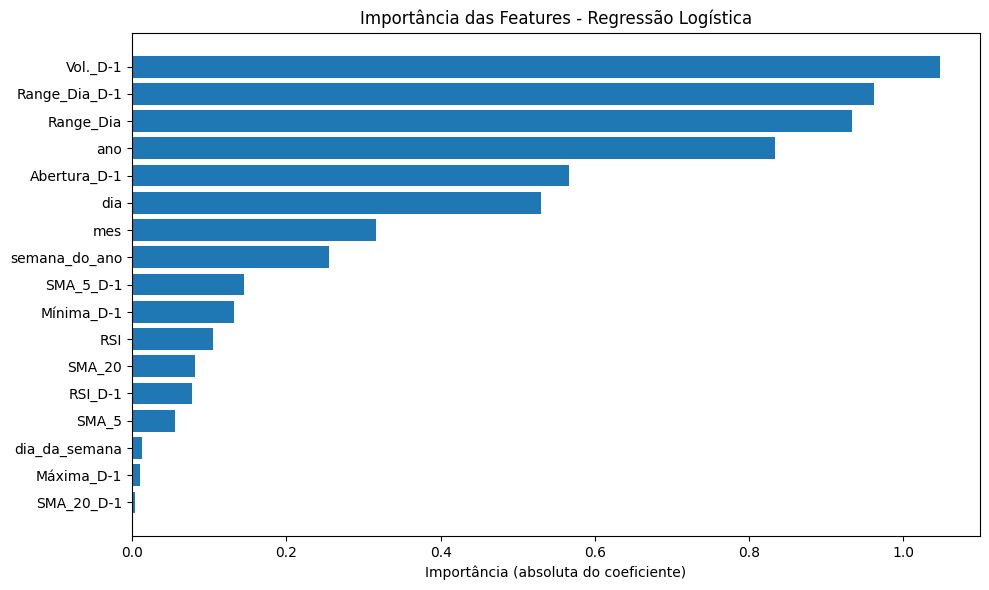

In [33]:
# Importância das features com coeficientes
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # usa os nomes das colunas originais
    'Importance': np.abs(model.coef_[0])  # pega o valor absoluto dos coeficientes
}).sort_values('Importance', ascending=False)

print("\n--- IMPORTÂNCIA DAS FEATURES ---")
print(feature_importance.to_string())

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importância (absoluta do coeficiente)')
plt.title('Importância das Features - Regressão Logística')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



# XGBoost

In [34]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.4,
    random_state=42,
    use_label_encoder=False, # Adicionado para evitar um warning comum
    eval_metric='logloss'     # Adicionado para evitar um warning comum
)

print("--- Avaliação do Modelo XGBoost ---")

# Treinamento
# Assumindo que X_train_scaled, y_train, X_test_scaled, e y_test já existem
model.fit(X_train_scaled, y_train)

# Previsão
y_pred = model.predict(X_test_scaled)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))
print("-" * 40)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("=== MATRIZ DE CONFUSÃO ===")
print("           Predição")
print("Real      Queda   Alta")
# Garante que a matriz de confusão exista antes de tentar acessá-la
print(f"Queda      {cm[0,0]:<7} {cm[0,1]}")
print(f"Alta       {cm[1,0]:<7} {cm[1,1]}")

# Adicionando resultado ao df_resultados
df_resultados.loc[df_resultados['modelo'] == 'XGBoost', ['acuracia', 'precisao', 'recall', 'f1-score']] = [accuracy, precision, recall, f1]

--- Avaliação do Modelo XGBoost ---
Acurácia: 0.7667
Precisão: 0.6207
Recall: 0.9474
F1-Score: 0.7500

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.73      1.00      0.84        19

    accuracy                           0.77        30
   macro avg       0.87      0.68      0.69        30
weighted avg       0.83      0.77      0.73        30

----------------------------------------
=== MATRIZ DE CONFUSÃO ===
           Predição
Real      Queda   Alta
Queda      4       7
Alta       0       19


### **Gráficos**

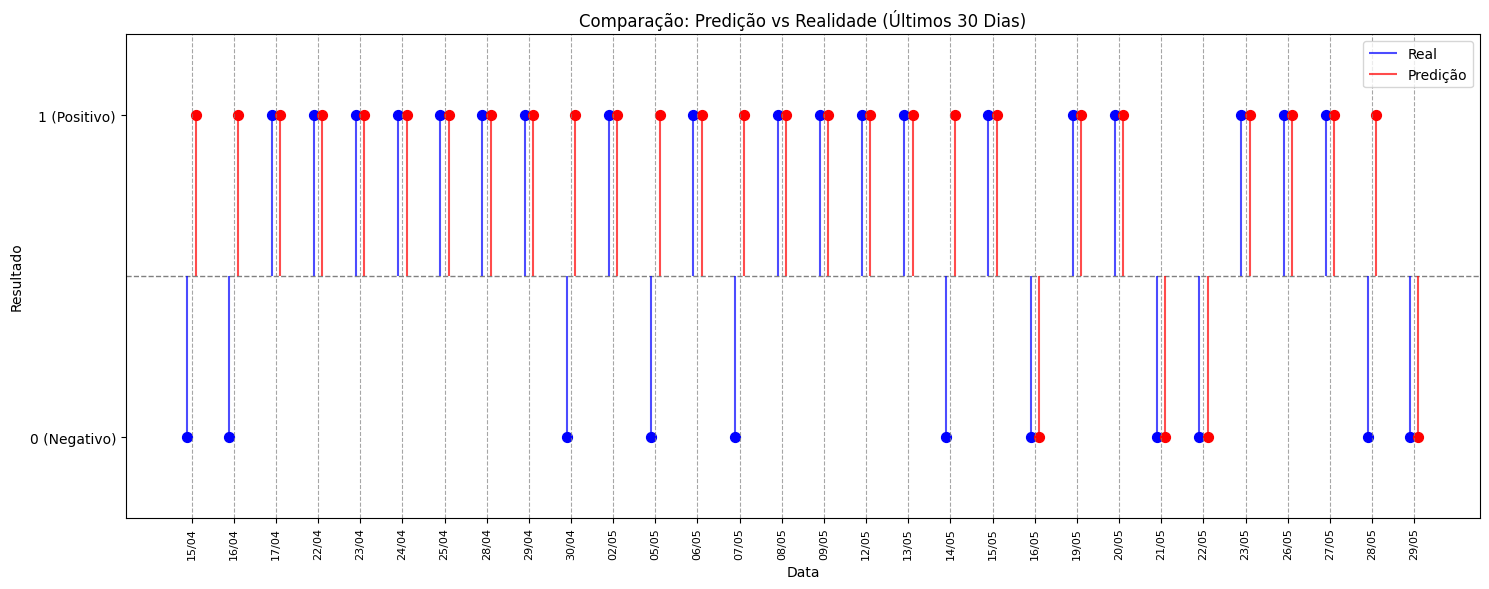

In [35]:
# Mapeia os valores: 0 para -1, 1 para 1
plot_real = np.where(y_test == 1, 1, -1)
plot_pred = np.where(y_pred == 1, 1, -1)

dates = df_test.index
variation_pct = df_test['Var%']

# Configuração do Gráfico
plt.figure(figsize=(15, 6))
ax = plt.gca()

#Linha horizontal no centro
ax.axhline(0, color='grey', lw=1, linestyle='--')

# Posições no eixo X
x_pos = np.arange(len(dates))
offset = 0.1 # Deslocamento para não sobrepor os pontos

# Dados Reais
ax.vlines(x_pos - offset, 0, plot_real, color='blue', alpha=0.7, label='Real')
ax.scatter(x_pos - offset, plot_real, color='blue', s=50)

# Dados de Predição
ax.vlines(x_pos + offset, 0, plot_pred, color='red', alpha=0.7, label='Predição')
ax.scatter(x_pos + offset, plot_pred, color='red', s=50)

# Ticks do eixo Y para mostrar 1 (Positivo) e 0 (Negativo)
ax.set_yticks([-1, 1])
ax.set_yticklabels(['0 (Negativo)', '1 (Positivo)'])
ax.set_ylim(-1.5, 1.5) # Adiciona espaço nas bordas

# Ticks do eixo X para todos os 30 dias
ax.set_xticks(x_pos)
ax.set_xticklabels([d.strftime('%d/%m') for d in dates], rotation=90, fontsize=8)

# Títulos e Legenda
plt.title('Comparação: Predição vs Realidade (Últimos 30 Dias)')
plt.xlabel('Data')
plt.ylabel('Resultado')
plt.legend()
plt.grid(True, axis='x', alpha=0.3) # Grade apenas no eixo X para clareza
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.grid(axis='x', which='both', linestyle='--', color='gray', alpha=0.7) # grid que separa os dias



plt.tight_layout()
plt.show()

In [36]:
# Análise detalhada
print("\n--- ANÁLISE DETALHADA ---")
print(f"Total de dias analisados: {len(y_test)}")
print(f"Dias positivos reais: {sum(y_test)}")
print(f"Dias negativos reais: {len(y_test) - sum(y_test)}")
print(f"Dias positivos preditos: {sum(y_pred)}")
print(f"Dias negativos preditos: {len(y_pred) - sum(y_pred)}")

# Acertos por classe
correct_positive = sum((y_test == 1) & (y_pred == 1))
correct_negative = sum((y_test == 0) & (y_pred == 0))
print(f"\nAcertos em dias positivos: {correct_positive}/{sum(y_test)}")
print(f"Acertos em dias negativos: {correct_negative}/{len(y_test) - sum(y_test)}")

# Criação de DataFrame com resultados detalhados
results_df = pd.DataFrame({
    'Data': dates,
    'Variacao_Real_%': variation_pct,
    'Classe_Real': y_test,
    'Classe_Predita': y_pred,
    'Acerto': y_test == y_pred
})

print("\n--- RESULTADOS DOS 30 DIAS DE TESTE ---")
print(results_df.to_string())




--- ANÁLISE DETALHADA ---
Total de dias analisados: 30
Dias positivos reais: 19
Dias negativos reais: 11
Dias positivos preditos: 26
Dias negativos preditos: 4

Acertos em dias positivos: 19/19
Acertos em dias negativos: 4/11

--- RESULTADOS DOS 30 DIAS DE TESTE ---
                 Data  Variacao_Real_%  Classe_Real  Classe_Predita  Acerto
Data                                                                       
2025-04-15 2025-04-15            -0.16            0               1   False
2025-04-16 2025-04-16            -0.72            0               1   False
2025-04-17 2025-04-17             1.04            1               1    True
2025-04-22 2025-04-22             0.63            1               1    True
2025-04-23 2025-04-23             1.34            1               1    True
2025-04-24 2025-04-24             1.79            1               1    True
2025-04-25 2025-04-25             0.12            1               1    True
2025-04-28 2025-04-28             0.21          


--- IMPORTÂNCIA DAS FEATURES ---
          Feature  Importance
0             ano    0.080585
14     SMA_20_D-1    0.067493
11     Mínima_D-1    0.064155
9    Abertura_D-1    0.063932
8       Range_Dia    0.062969
16  Range_Dia_D-1    0.062192
10     Máxima_D-1    0.060341
6          SMA_20    0.058333
2             dia    0.057934
7             RSI    0.057194
5           SMA_5    0.057106
1             mes    0.055633
15        RSI_D-1    0.055359
4   semana_do_ano    0.051137
13      SMA_5_D-1    0.050394
12       Vol._D-1    0.050246
3   dia_da_semana    0.044998


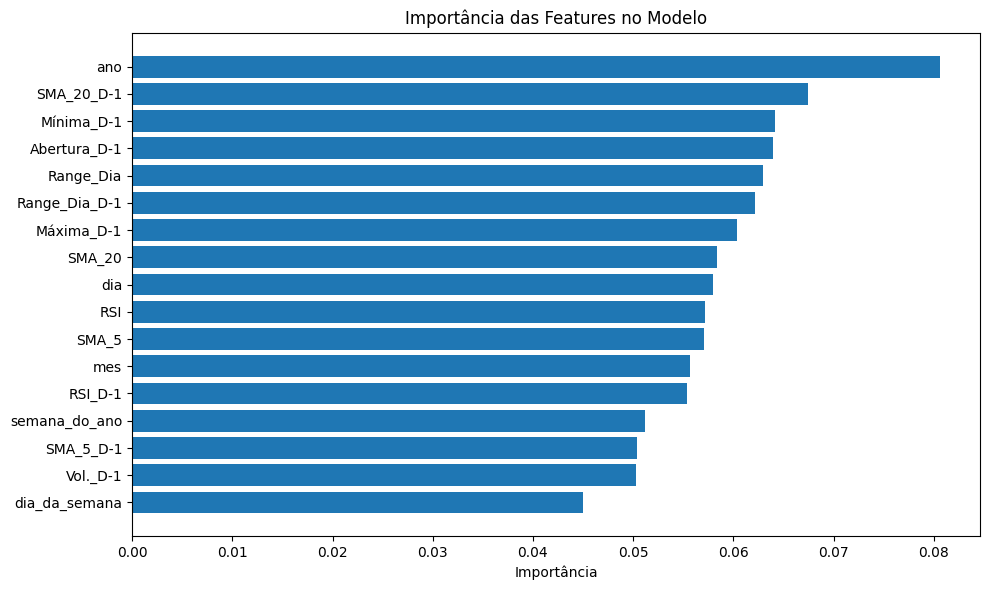

In [37]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- IMPORTÂNCIA DAS FEATURES ---")
print(feature_importance.to_string())

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gradient Boost


In [38]:
model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    random_state=42
)

print("--- Avaliação do Modelo Gradient Boosting ---")

# Treinamento
model.fit(X_train_scaled, y_train)

# Previsão
y_pred = model.predict(X_test_scaled)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))
print("-" * 40)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("=== MATRIZ DE CONFUSÃO ===")
print("              Predição")
print("Real      Queda  Alta")
print(f"Queda       {cm[0,0]}     {cm[0,1]}")
print(f"Alta        {cm[1,0]}     {cm[1,1]}")

# Adicionando resultado ao df_resultados
df_resultados.loc[df_resultados['modelo'] == 'Gradient Boost', ['acuracia', 'precisao', 'recall', 'f1-score']] = [accuracy, precision, recall, f1]

--- Avaliação do Modelo Gradient Boosting ---
Acurácia: 0.5667
Precisão: 0.6207
Recall: 0.9474
F1-Score: 0.7500

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.62      0.84      0.71        19

    accuracy                           0.57        30
   macro avg       0.43      0.47      0.42        30
weighted avg       0.48      0.57      0.50        30

----------------------------------------
=== MATRIZ DE CONFUSÃO ===
              Predição
Real      Queda  Alta
Queda       1     10
Alta        3     16


### **Gráficos**

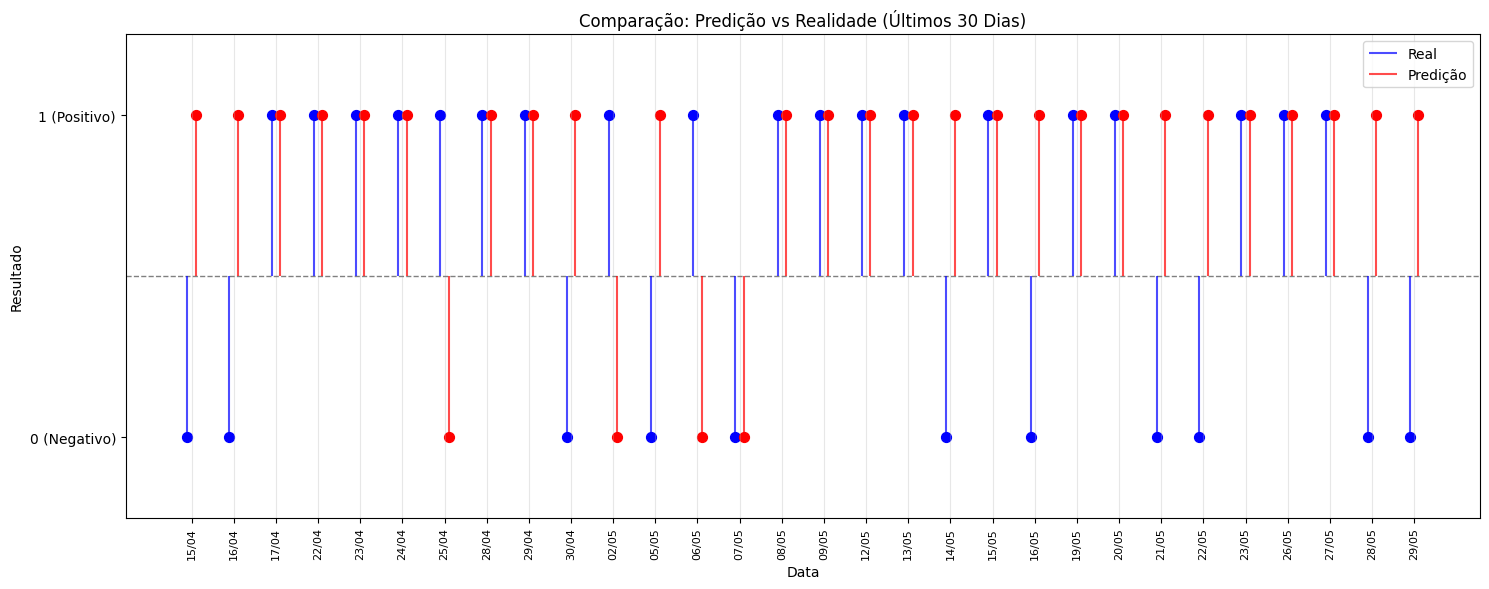

In [39]:
# Mapeia os valores: 0 para -1, 1 para 1
plot_real = np.where(y_test == 1, 1, -1)
plot_pred = np.where(y_pred == 1, 1, -1)

dates = df_test.index
variation_pct = df_test['Var%']

# Configuração do Gráfico
plt.figure(figsize=(15, 6))
ax = plt.gca()

# 1. Linha horizontal no centro
ax.axhline(0, color='grey', lw=1, linestyle='--')

# Posições no eixo X
x_pos = np.arange(len(dates))
offset = 0.1 # Deslocamento para não sobrepor os pontos

# Dados Reais
ax.vlines(x_pos - offset, 0, plot_real, color='blue', alpha=0.7, label='Real')
ax.scatter(x_pos - offset, plot_real, color='blue', s=50)

# Dados de Predição
ax.vlines(x_pos + offset, 0, plot_pred, color='red', alpha=0.7, label='Predição')
ax.scatter(x_pos + offset, plot_pred, color='red', s=50)

# Ticks do eixo Y para mostrar 1 (Positivo) e 0 (Negativo)
ax.set_yticks([-1, 1])
ax.set_yticklabels(['0 (Negativo)', '1 (Positivo)'])
ax.set_ylim(-1.5, 1.5) # Adiciona espaço nas bordas

# Ticks do eixo X para todos os 30 dias
ax.set_xticks(x_pos)
ax.set_xticklabels([d.strftime('%d/%m') for d in dates], rotation=90, fontsize=8)

# Títulos e Legenda
plt.title('Comparação: Predição vs Realidade (Últimos 30 Dias)')
plt.xlabel('Data')
plt.ylabel('Resultado')
plt.legend()
plt.grid(True, axis='x', alpha=0.3) # Grade apenas no eixo X para clareza
plt.tight_layout() # Ajusta o layout para evitar sobreposição



plt.tight_layout()
plt.show()

In [40]:
# Análise detalhada
print("\n--- ANÁLISE DETALHADA ---")
print(f"Total de dias analisados: {len(y_test)}")
print(f"Dias positivos reais: {sum(y_test)}")
print(f"Dias negativos reais: {len(y_test) - sum(y_test)}")
print(f"Dias positivos preditos: {sum(y_pred)}")
print(f"Dias negativos preditos: {len(y_pred) - sum(y_pred)}")

# Acertos por classe
correct_positive = sum((y_test == 1) & (y_pred == 1))
correct_negative = sum((y_test == 0) & (y_pred == 0))
print(f"\nAcertos em dias positivos: {correct_positive}/{sum(y_test)}")
print(f"Acertos em dias negativos: {correct_negative}/{len(y_test) - sum(y_test)}")

# Criação de DataFrame com resultados detalhados
results_df = pd.DataFrame({
    'Data': dates,
    'Variacao_Real_%': variation_pct,
    'Classe_Real': y_test,
    'Classe_Predita': y_pred,
    'Acerto': y_test == y_pred
})

print("\n--- RESULTADOS DOS 30 DIAS DE TESTE ---")
print(results_df.to_string())




--- ANÁLISE DETALHADA ---
Total de dias analisados: 30
Dias positivos reais: 19
Dias negativos reais: 11
Dias positivos preditos: 26
Dias negativos preditos: 4

Acertos em dias positivos: 16/19
Acertos em dias negativos: 1/11

--- RESULTADOS DOS 30 DIAS DE TESTE ---
                 Data  Variacao_Real_%  Classe_Real  Classe_Predita  Acerto
Data                                                                       
2025-04-15 2025-04-15            -0.16            0               1   False
2025-04-16 2025-04-16            -0.72            0               1   False
2025-04-17 2025-04-17             1.04            1               1    True
2025-04-22 2025-04-22             0.63            1               1    True
2025-04-23 2025-04-23             1.34            1               1    True
2025-04-24 2025-04-24             1.79            1               1    True
2025-04-25 2025-04-25             0.12            1               0   False
2025-04-28 2025-04-28             0.21          


--- IMPORTÂNCIA DAS FEATURES ---
          Feature  Importance
12       Vol._D-1    0.132858
16  Range_Dia_D-1    0.120609
8       Range_Dia    0.103006
7             RSI    0.096236
15        RSI_D-1    0.095891
2             dia    0.071538
10     Máxima_D-1    0.059794
14     SMA_20_D-1    0.058728
6          SMA_20    0.056734
13      SMA_5_D-1    0.039049
9    Abertura_D-1    0.038682
5           SMA_5    0.034428
0             ano    0.033159
4   semana_do_ano    0.024700
11     Mínima_D-1    0.024429
3   dia_da_semana    0.005790
1             mes    0.004368


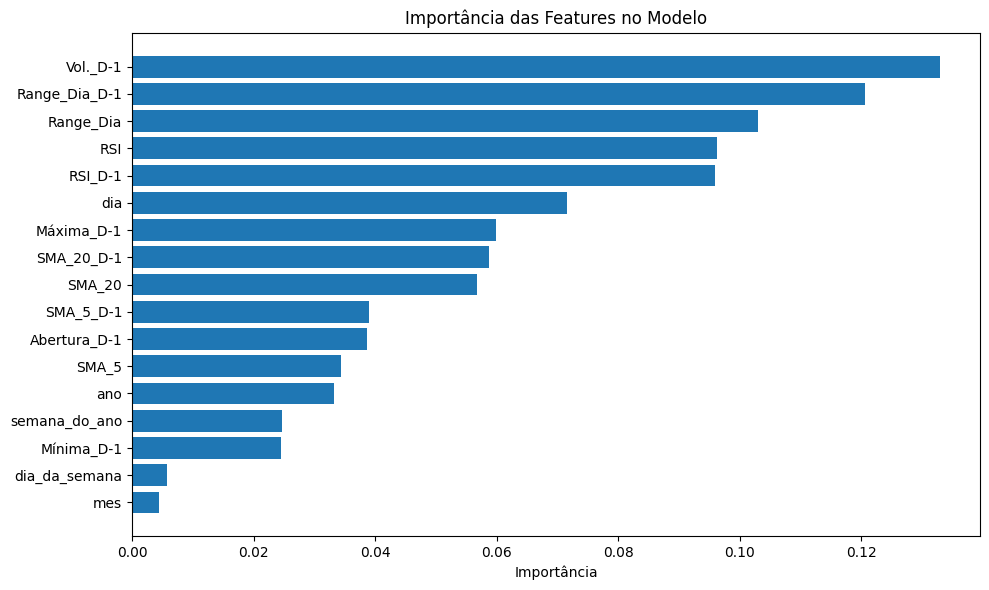

In [41]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- IMPORTÂNCIA DAS FEATURES ---")
print(feature_importance.to_string())

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Linear Regression

In [42]:
# Modelo
model = LinearRegression()
model_name = 'Linear Regression'

print(f"--- Avaliação do Modelo: {model_name} ---")

# Treinamento
model.fit(X_train_scaled, y_train)

# Previsão
y_pred = model.predict(X_test_scaled)

# Avaliação para Regressão
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir relatório de regressão
print(f"\n--- {model_name} ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("-" * 40)

--- Avaliação do Modelo: Linear Regression ---

--- Linear Regression ---
R-squared (R²): -0.0588
Mean Squared Error (MSE): 0.2459
Mean Absolute Error (MAE): 0.4687
----------------------------------------


In [43]:
# Previsão da Regressão Linear (gera valores contínuos)
y_pred_continuous = model.predict(X_test_scaled)

# Arredonda os resultados para a classe mais próxima (0 ou 1)
y_pred_classes = np.round(y_pred_continuous).astype(int)

# Agora sim, calcula a acurácia com as classes
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Acurácia (após arredondamento): {accuracy:.4f}")

Acurácia (após arredondamento): 0.6000


# Comparação dos modelos

**Acurácia** (Accuracy): A porcentagem de previsões que o modelo acertou no total (considerando tanto os acertos de classe positiva quanto negativa).

*Pergunta*: Do total de previsões, qual a proporção de acertos?<br><br>

**Precisão** (Precision): Das vezes que o modelo previu o resultado como positivo, quantas ele realmente acertou. Mede a qualidade das previsões positivas.

*Pergunta*: Quando o modelo diz "sim", qual a sua taxa de acerto?<br><br>  

**Recall** (Sensibilidade): De todos os resultados que eram realmente positivos, quantos o modelo conseguiu identificar corretamente. Mede a capacidade do modelo de encontrar todos os positivos.

*Pergunta*: De todos os "sim" reais, quantos o modelo encontrou?<br><br>

**F1-Score**: Uma média harmônica entre a Precisão e o Recall. É uma métrica única que busca um bom equilíbrio entre as duas.

*Pergunta*: Qual o balanço geral entre a precisão e o recall?

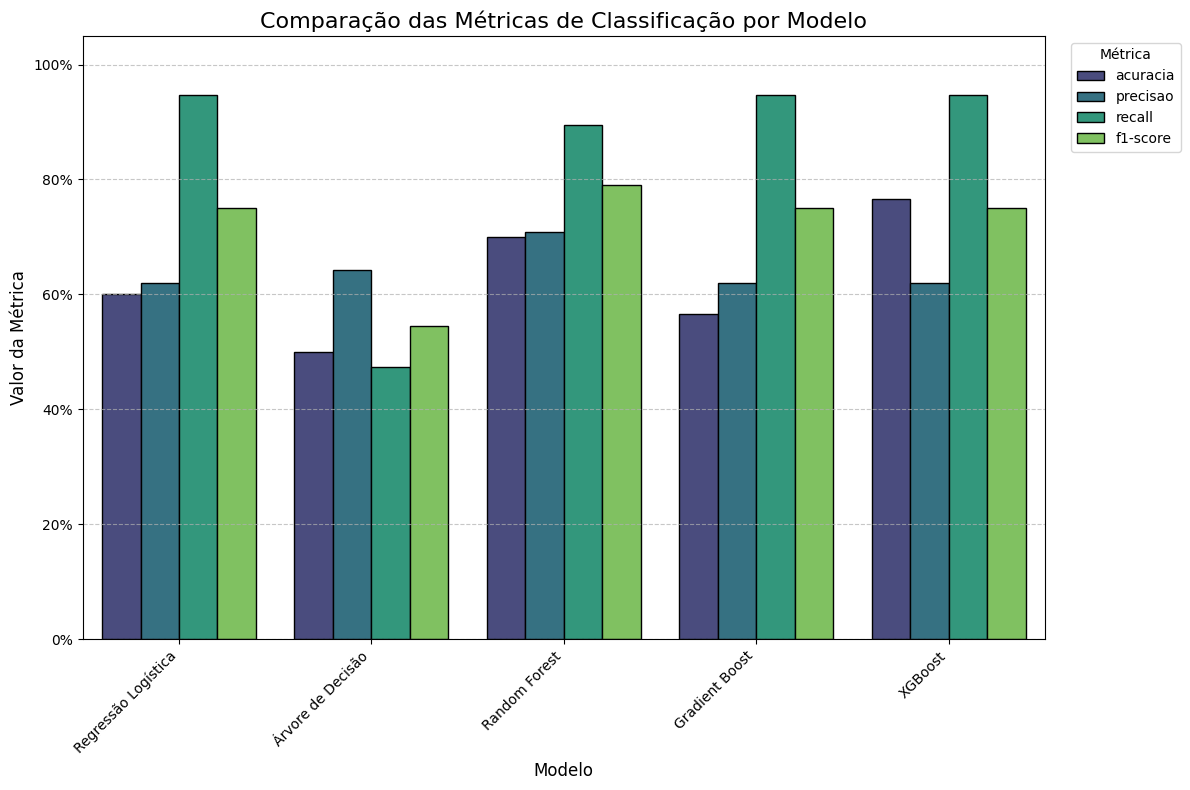

In [59]:
# Cria dataframe com 'modelo' e 'metricas' como colunas
df_melted = df_resultados.melt(
    id_vars='modelo',
    var_name='metrica',
    value_name='valor'
)

# Define a ordem das metricas
metric_order = ['acuracia', 'precisao', 'recall', 'f1-score']
df_melted['metrica'] = pd.Categorical(df_melted['metrica'], categories=metric_order, ordered=True)
df_melted.sort_values('metrica', inplace=True)

# Cria as barras agrupadas
plt.figure(figsize=(12, 8))
# Captura o eixo (ax) para poder formatá-lo
ax = sns.barplot(
    data=df_melted,
    x='modelo',
    y='valor',
    hue='metrica',
    palette='viridis',
    edgecolor='black'
)

# Add titulos e labels
plt.title('Comparação das Métricas de Classificação por Modelo', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Valor da Métrica', fontsize=12)

# Define o limite do eixo y
plt.ylim(0, 1.05)

# O xmax=1.0 indica que o valor 1.0 corresponde a 100%
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.legend(title='Métrica', bbox_to_anchor=(1.02, 1), loc='upper left')

# Aparência
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Garante que tudo se ajuste bem na figura
plt.tight_layout()

# Exibe o gráfico
plt.show()

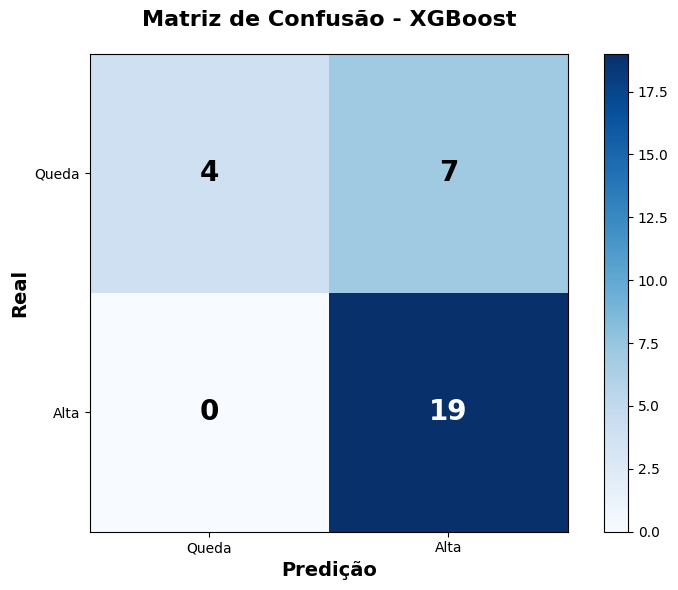

In [45]:
# Matriz de confusão
def plot_simple_confusion_matrix():
    fig, ax = plt.subplots(figsize=(8, 6))

    # Dados da matriz
    cm = np.array([[4, 7], [0, 19]])

    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=20, fontweight='bold')

    ax.set_title('Matriz de Confusão - XGBoost', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Real', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predição', fontsize=14, fontweight='bold')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Queda', 'Alta'])
    ax.set_yticklabels(['Queda', 'Alta'])

    plt.tight_layout()
    plt.show()

plot_simple_confusion_matrix()